In [195]:
import sklearn
import warnings
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
boston = load_boston()

In [196]:
print(boston.keys())
print(boston.data.shape)
print(boston.DESCR)
X=pd.DataFrame(boston.data)
X.head(10)
y=boston.target

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
#verification
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex.2

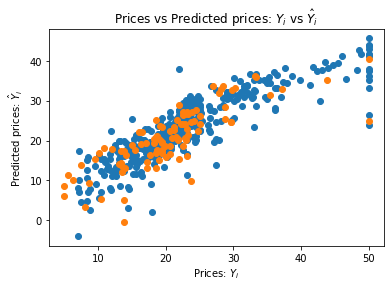

In [198]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_pred=model.predict(X_test)
plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [199]:
import sklearn.metrics as metrics
print(metrics.mean_squared_error(y_pred,y_test))
model.score(X_test,y_test)

24.52374143312431


0.6177265992293743

Polynomial Features

In [200]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features = PolynomialFeatures(degree=2)
X_pol=polynomial_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


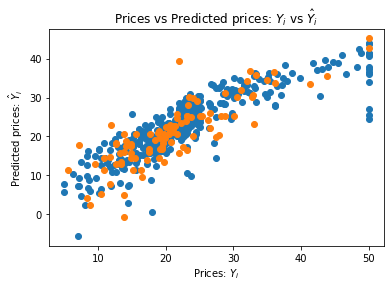

In [201]:
model=LinearRegression()

model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_pred=model.predict(X_test)

plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [202]:
print(metrics.mean_squared_error(y_pred,y_test))
model.score(X_test,y_test)

22.042579216213287


0.6922908805512096

Lasso and Ridge model

In [203]:
from sklearn.linear_model import Lasso,Ridge
alpha_list=np.linspace(0.001,10,1000)
MSE_list=[]
score_list=[]


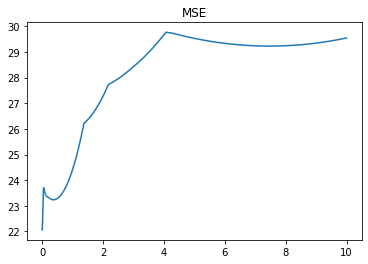

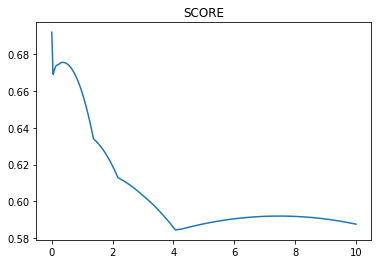

In [204]:
for alpha in alpha_list:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    y_pred=lasso.predict(X_test)
    MSE_list.append(metrics.mean_squared_error(y_pred,y_test))
    score_list.append(lasso.score(X_test,y_test))

plt.plot(alpha_list,MSE_list)
plt.title("MSE")
plt.show()
plt.title("SCORE")
plt.plot(alpha_list,score_list)
plt.show()

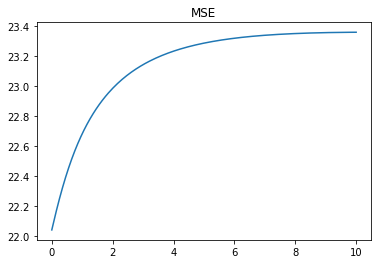

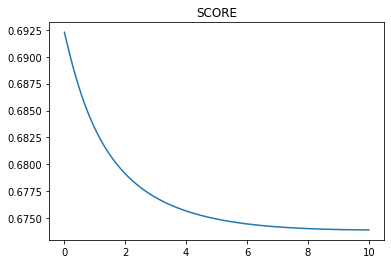

In [205]:
alpha_list=np.linspace(0.001,10,200)
MSE_list=[]
score_list=[]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_pred=ridge.predict(X_test)
    MSE_list.append(metrics.mean_squared_error(y_pred,y_test))
    score_list.append(ridge.score(X_test,y_test))

plt.plot(alpha_list,MSE_list)
plt.title("MSE")
plt.show()
plt.title("SCORE")
plt.plot(alpha_list,score_list)
plt.show()

Regularization for Logistic Regression - dataset A

In [206]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

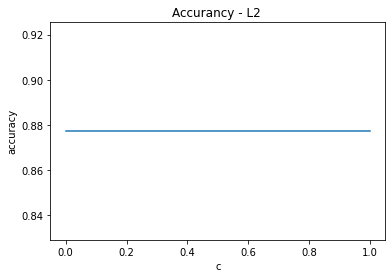

In [207]:
from sklearn.linear_model import LogisticRegression

c_list=np.linspace(0.0001,1,50)
score_lst=[]
for c in c_list:
    logreg=LogisticRegression(penalty='l2',C=c,solver='saga')
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    score_lst.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(c_list,score_lst)
plt.title("Accurancy - L2 ")
plt.xlabel("c")
plt.ylabel("accuracy")
plt.show()